In [82]:
import pandas as pd
df_coffee=pd.read_feather('coffee_ratings_full.feather')

In [84]:
ilkAltiUlke=list(df_coffee.groupby('country_of_origin')['country_of_origin'].count().nlargest(6).index)
ilkAltiUlkeKarsilastirma=df_coffee['country_of_origin'].isin(ilkAltiUlke)
ilkAltiUlkeUyusanlar=df_coffee[ilkAltiUlkeKarsilastirma]

In [86]:
ilkAltiUlkeUyusanlarOrneklem=ilkAltiUlkeUyusanlar.groupby('country_of_origin').sample(frac=0.1,random_state=2001)

In [88]:
# Simple Random Samples Mean (Basit Rastgele Orneklemin Ortalamasi) : 
ilkAltiUlkeUyusanlar['total_cup_points'].mean()

81.94700000000002

In [90]:
# Stratified Sample Mean (Tabakali Orneklem Ortalamasi) :
ilkAltiUlkeUyusanlarOrneklem['total_cup_points'].mean()

82.38806818181818

In [92]:
benzersizDegerler=list(df_coffee['variety'].unique())
import random 
benzersizDegerlerOrneklem=random.sample(benzersizDegerler,k=1)
benzersizDegerlerKarsilastirma=df_coffee['variety'].isin(benzersizDegerlerOrneklem)
benzersizDegerlerUyusanlar=df_coffee[benzersizDegerlerKarsilastirma]
benzersizDegerlerUyusanlar.loc[:,'variety']=benzersizDegerlerUyusanlar['variety'].astype('category').cat.remove_unused_categories()

In [94]:
# Cluster Sample Mean (Kume Orneklem Ortalamasi) :
benzersizDegerlerUyusanlar['total_cup_points'].mean()

83.91666666666667

In [96]:
ilkAltiUlkeUyusanlar.groupby('total_cup_points')['total_cup_points'].mean() # Ayni toplam kupa sayisina sahip ulkelerin ortalamasini bulur.
# Orneklem sayisi arttikca relative error düşer yani popülasyona o kadar yaklaşırız.

total_cup_points
59.83    59.83
68.33    68.33
70.67    70.67
70.75    70.75
71.00    71.00
         ...  
86.92    86.92
87.17    87.17
87.92    87.92
88.83    88.83
89.75    89.75
Name: total_cup_points, Length: 143, dtype: float64

In [98]:
print(len(df_coffee.sample(n=300))) # Rastgele olusturulan bir orneklemin eleman sayisini yazdirir.

300


In [100]:
print(len(df_coffee.sample(frac=0.25)))

334


In [102]:
# Göreceli Hata Yüzdesi Formülü :
# relative_errorr_percentae = 100 * abs(population_mean-sample_mean) / population_mean
# Bir popülasyonun ortalaması ile bir örneklem ortalaması arasındaki göreli hata yüzdesini hesaplamak için kullanılır.

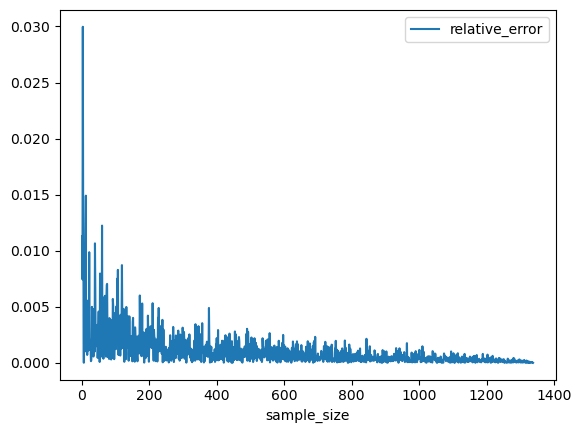

In [104]:
# Kod ile Goreceli Hata Formulu : (!!!)
import numpy as np
import matplotlib.pyplot as plt
df_error=pd.DataFrame(columns=['sample_size','relative_error']) # Verdigimiz adlarda iki sutun olusturarak olusturdugumuz df in icine atar.
pop_mean=df_coffee['total_cup_points'].mean()
for num_of_rows in range(1,len(df_coffee)+1):
    sample_mean=df_coffee.sample(n=num_of_rows)['total_cup_points'].mean()
    rel_err=np.abs(pop_mean-sample_mean)/pop_mean
    df_error.loc[len(df_error.index)]=[num_of_rows,rel_err] # Olusturdugumuz degerleri satirlara atar.
df_error.plot(x='sample_size',y='relative_error',kind='line')
plt.show()

In [105]:
print(df_coffee.sample(n=30)['total_cup_points'].mean())
print(df_coffee.sample(n=30)['total_cup_points'].mean())
print(df_coffee.sample(n=30)['total_cup_points'].mean())
print(df_coffee.sample(n=30)['total_cup_points'].mean())

81.50833333333334
82.77199999999999
82.38633333333334
82.23133333333334


(array([ 1.,  0.,  1.,  3.,  3.,  7.,  5., 10., 11., 27., 33., 46., 55.,
        62., 55., 60., 84., 77., 64., 76., 89., 70., 50., 34., 25., 22.,
        17.,  8.,  3.,  2.]),
 array([80.49733333, 80.59297778, 80.68862222, 80.78426667, 80.87991111,
        80.97555556, 81.0712    , 81.16684444, 81.26248889, 81.35813333,
        81.45377778, 81.54942222, 81.64506667, 81.74071111, 81.83635556,
        81.932     , 82.02764444, 82.12328889, 82.21893333, 82.31457778,
        82.41022222, 82.50586667, 82.60151111, 82.69715556, 82.7928    ,
        82.88844444, 82.98408889, 83.07973333, 83.17537778, 83.27102222,
        83.36666667]),
 <BarContainer object of 30 artists>)

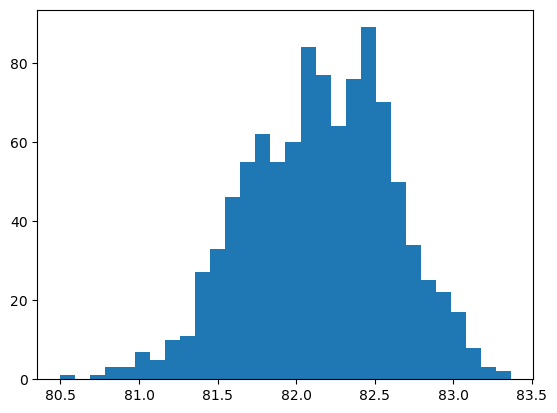

In [106]:
mean_cup_points=[]
for i in range(1000):
    mean_cup_points.append(df_coffee.sample(n=30)['total_cup_points'].mean())
mean_cup_points
plt.hist(mean_cup_points,bins=30)

(array([  3.,   0.,   1.,   0.,   1.,   1.,   1.,  11.,  11.,  12.,  16.,
         30.,  37.,  29.,  67.,  68.,  86., 104., 108., 105.,  89.,  64.,
         66.,  36.,  22.,  16.,  12.,   2.,   1.,   1.]),
 array([77.25      , 77.52261111, 77.79522222, 78.06783333, 78.34044444,
        78.61305556, 78.88566667, 79.15827778, 79.43088889, 79.7035    ,
        79.97611111, 80.24872222, 80.52133333, 80.79394444, 81.06655556,
        81.33916667, 81.61177778, 81.88438889, 82.157     , 82.42961111,
        82.70222222, 82.97483333, 83.24744444, 83.52005556, 83.79266667,
        84.06527778, 84.33788889, 84.6105    , 84.88311111, 85.15572222,
        85.42833333]),
 <BarContainer object of 30 artists>)

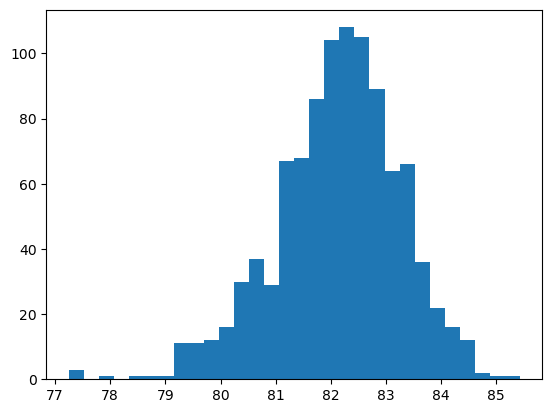

In [107]:
mean_cup_points=[]
for i in range(1000):
    mean_cup_points.append(df_coffee.sample(n=6)['total_cup_points'].mean())
mean_cup_points
plt.hist(mean_cup_points,bins=30)

In [111]:
# Ustteki 2 kodun farki orneklem buyuklugunun dagilim uzerindeki etkisidir.
# Orneklem buyuklugu arttikca (n=30) ortalama degerlerin varyansi (dagilim genisligi) azalir.
# Histogramdaki değerler daha sıkı bir aralıkta toplanır ve daha düzgün (çan eğrisi gibi) bir şekil oluşur.
# Bu, merkezi limit teoremi sayesinde olur. Büyük örneklemler, popülasyon ortalamasına daha yakın değerler üretir.
# Sonuç: Daha güvenilir ortalamalar elde edilir.

In [114]:
import itertools as it # Kombinasyon, permutasyon ve carpim gibi islemleri yapan kutuphanedir.
dice={ # 4 zari ve alabilecegi degerleri bir sozluge aktardik.
    'die':[1,2,3,4,5,6],
    'die2':[1,2,3,4,5,6],
    'die3':[1,2,3,4,5,6],
    'die4':[1,2,3,4,5,6],
}
result=pd.DataFrame(it.product(*dice.values()),columns=dice.keys()) # *dice_values() ile die degerlerini parametre olarak verir.
# it.product() verilen dice degerlerinin carpimini yapar.
# dice.keys() dice sozlugunun degisken isimlerini sutun olarak atar.
result['mean_roll']=(result['die']+result['die2']+result['die3']+result['die4'])/4
result

,die,die2,die3,die4,mean_roll
0,1,1,1,1,1.00
1,1,1,1,2,1.25
2,1,1,1,3,1.50
3,1,1,1,4,1.75
4,1,1,1,5,2.00
...,...,...,...,...,...
1291,6,6,6,2,5.00
1292,6,6,6,3,5.25
1293,6,6,6,4,5.50
1294,6,6,6,5,5.75


<Axes: xlabel='mean_roll'>

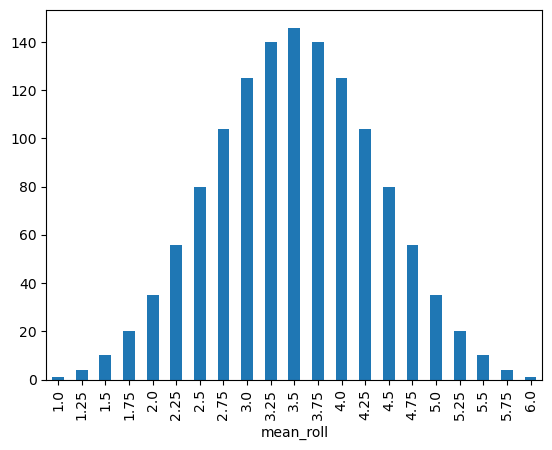

In [116]:
result['mean_roll']=result['mean_roll'].astype('category')
result['mean_roll'].value_counts(sort=False).plot(kind='bar') # mean_roll sutunundaki benzersiz degerlerin kac kere gectigini toplayip
# siralama yapmadan bar grafigi cizdiriyoruz.

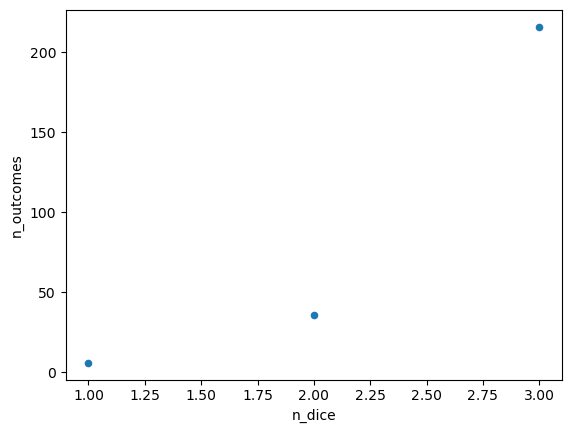

In [118]:
### 1'den 100'e Kadar Artan Zar Adetlerinin Olasi Sonuclarini Hesaplayan Kod :
n_dice=list(range(1,4)) # Toplam zar sayisini ifade eder.
n_outcomes=[]
for n in n_dice:
    n_outcomes.append(6**n) # Her zar icin ihtimal hesaplama.
outcomes=pd.DataFrame({
    'n_dice':n_dice,
    'n_outcomes':n_outcomes
})
outcomes.plot(x='n_dice',y='n_outcomes',kind='scatter')
plt.show()

(array([  4.,   7.,  13.,  30.,  53.,  55.,  93., 101., 109.,   0., 103.,
        104., 102.,  74.,  61.,  33.,  37.,  14.,   4.,   3.]),
 array([1.25 , 1.475, 1.7  , 1.925, 2.15 , 2.375, 2.6  , 2.825, 3.05 ,
        3.275, 3.5  , 3.725, 3.95 , 4.175, 4.4  , 4.625, 4.85 , 5.075,
        5.3  , 5.525, 5.75 ]),
 <BarContainer object of 20 artists>)

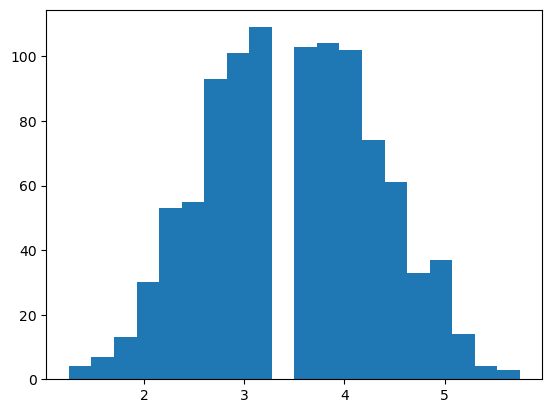

In [120]:
# Bir Zarın 4 Kez Atılması Durumunda 1000 Farklı Orneklem Için Ortalamaları Hesaplayan Kod:
sample_means_1000=[]
for i in range(1000):
    sample_means_1000.append(np.random.choice(range(1,7),size=4,replace=True).mean())
sample_means_1000
plt.hist(sample_means_1000,bins=20)

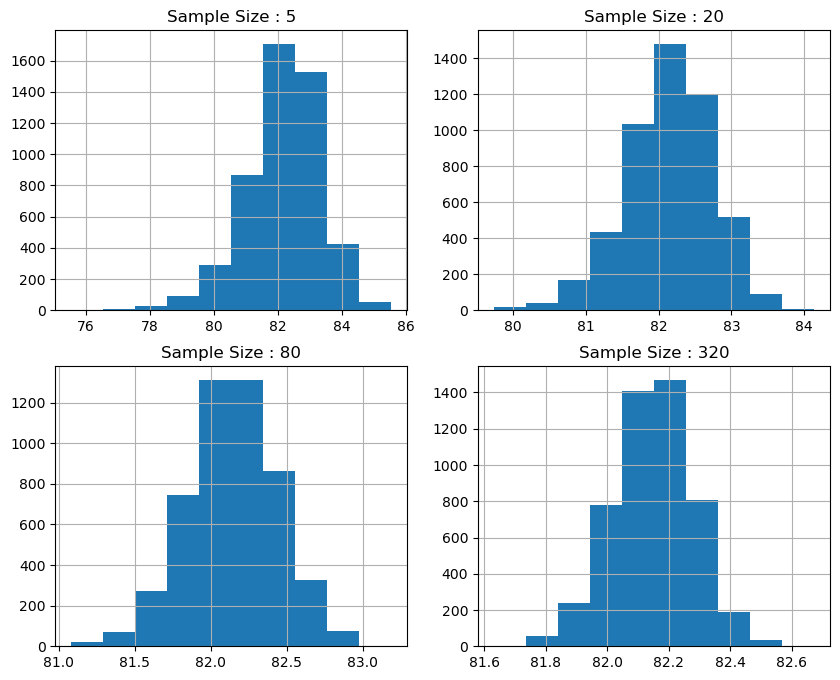

In [122]:
fig,axs=plt.subplots(2,2,figsize=(10,8)) # 2x2 duzeninde 4 grafik olusturur ve grafiklerin genisligini 10 yuksekligini 8 verir.
mean_cup_points_5=[]
for i in range(5000):
    mean_cup_points_5.append(df_coffee.sample(n=5)['total_cup_points'].mean())
axs[0,0].hist(mean_cup_points_5)
axs[0,0].set_title('Sample Size : 5')
axs[0,0].grid(True) # Grafige kilavuz cizgileri ceker.
mean_cup_points_20=[]
for i in range(5000):
    mean_cup_points_20.append(df_coffee.sample(n=20)['total_cup_points'].mean())
axs[0,1].hist(mean_cup_points_20)
axs[0,1].set_title('Sample Size : 20')
axs[0,1].grid(True)
mean_cup_points_80=[]
for i in range(5000):
    mean_cup_points_80.append(df_coffee.sample(n=80)['total_cup_points'].mean())
axs[1,0].hist(mean_cup_points_80)
axs[1,0].set_title('Sample Size : 80')
axs[1,0].grid(True)
mean_cup_points_320=[]
for i in range(5000):
    mean_cup_points_320.append(df_coffee.sample(n=320)['total_cup_points'].mean())
axs[1,1].hist(mean_cup_points_320)
axs[1,1].set_title('Sample Size : 320')
axs[1,1].grid(True)

In [123]:
print(f'Population Standart Deviation:{df_coffee['total_cup_points'].std(ddof=1)}')
print(f'5 Sample Standart Deviation:{np.std(mean_cup_points_5,ddof=1)}')
print(f'20 Sample Standart Deviation:{np.std(mean_cup_points_20,ddof=1)}')
print(f'80 Sample Standart Deviation:{np.std(mean_cup_points_80,ddof=1)}')
print(f"320 Sample Standart Deviation : {np.std(mean_cup_points_320, ddof=1)}")

Population Standart Deviation:2.686862434186662
5 Sample Standart Deviation:1.1719874936995351
20 Sample Standart Deviation:0.5964644142825382
80 Sample Standart Deviation:0.29729939409309264
320 Sample Standart Deviation : 0.13027330458116737


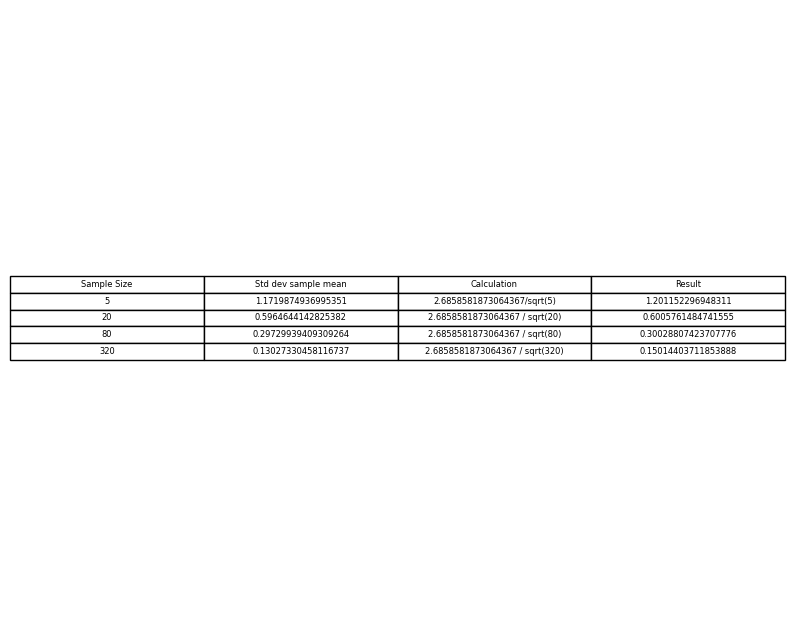

In [124]:
# Orneklem Büyüklüklerine Bağlı Olarak Orneklem Ortalamalarının Standart Sapmalarını Hesaplayan Kod :
data=[
    [5,np.std(mean_cup_points_5,ddof=1),f'{df_coffee['total_cup_points'].std(ddof=0)}/sqrt(5)',df_coffee['total_cup_points'].std(ddof=0)/
    np.sqrt(5)],
    [20, np.std(mean_cup_points_20, ddof=1), f"{df_coffee['total_cup_points'].std(ddof=0)} / sqrt(20)", 
    df_coffee['total_cup_points'].std(ddof=0) / np.sqrt(20)],
    [80, np.std(mean_cup_points_80, ddof=1), f"{df_coffee['total_cup_points'].std(ddof=0)} / sqrt(80)",
    df_coffee['total_cup_points'].std(ddof=0) / np.sqrt(80)],
    [320, np.std(mean_cup_points_320, ddof=1), f"{df_coffee['total_cup_points'].std(ddof=0)} / sqrt(320)",
    df_coffee['total_cup_points'].std(ddof=0) / np.sqrt(320)]
]
column_labels=["Sample Size", "Std dev sample mean", "Calculation", "Result"]
fig,ax=plt.subplots(figsize=(10,8))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,cellLoc='center',loc='center')
# cellText tablo hücrelerinde gösterilecek veri (örneğin Sample Size, Std dev sample mean gibi hesaplamalar).
# colLabels sütun başlıklarını tanımlar.
# cellLoc hücre içeriğini ortalar.
# loc tabloyu grafik alanının ortasına yerleştirir.